In [18]:
#Importing the necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Loading Training dataset into dataframe
df= pd.read_csv('capstone_data/train.csv')

In [20]:
#DataFrame shape
df.shape

(1460, 81)

In [21]:
# First 5 rows in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
# DataFrame Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Observations

From the above outputs, We could observe that,

1. The given dataset consists of total 81 columns i.e. features and a total of 1460 rows/ records for each feature.
2. There is rich blend of both the numerical and the categorical variables in the dataset.
3. Also, We observe that NULL/ NaN values are also present in the dataset.

### Identifying the numerical Variables

In [23]:
# Extracting the numerical variable names into a list
df_numerics_only = df.select_dtypes(include=np.number).columns.tolist()

len(df_numerics_only)


38

In [24]:
print(df_numerics_only)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


There ara a total of 38 features with numerical inputs in the dataset.
These features are listed above.

### Identifying the Categorical Variables

In [25]:
# Extracting the numerical variable names into a list
df_categorical_only = df.select_dtypes(include=np.object).columns.tolist()
len(df_categorical_only)

43

In [26]:
print(df_categorical_only)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


As seen above, there are a total of 43 categorical variables in the given dataset.


### Observation

In the above section, we performed the segregation of the features into numerical and categorical features.

We could confirm, that the data is almost equally divided amongst the two feature types, with numerical type having 38 features and categorical having 43 features. 

### Target Variable

"SalePrice" column (a numerical feature) would be our target variable.

Under this Project, our model would be trained at predicting the "SalePrice" of the house.

In the furher course of the project, we would find out the features that have a high impact on the "SalePrice" value and the relation(postive/ negative impact) between them .


## Independent Variables

### Handling the missing values

In [27]:
# Finding the total NULL entries per feature/ column
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Above, We find out the number of NULL value entries present in the given dataset.
We would analyse the same using the heatmap below.

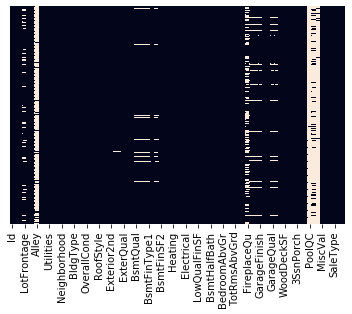

In [28]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

### Observation

The white bars in the heatmap above, represents the NULL values that exist in the dataset.

And, and we could observe, the NULL values are spread across the dataset.

For some of the columns, the presence is low, however for few other columns, the majority of all entries are NULL values only.


### Plan to Handle the missing values

We followed the below approach in dealing with the missing values.

1. If the number of missing values exceed 50% of the total entries, then we drop the column altogether.
2. For columns containing categorical values, We replace the missing values with the mode value of the column.
3. For columns with numerical variables, replace the missing values with the median value of the column.


#### Columns where the missing values exceed 50% of the total entries.

In [29]:
# Dropping the Alley, PoolQC, Fence and MiscFeature columns.
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
df.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)


#### Handling missing values for the numerical features


In [30]:
# Replace NULL values with mean value for the column
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

#### Handling missing values for the categorical features


In [31]:
# Replace NULL values with mode value of the column
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])


#### NULL value removal verification

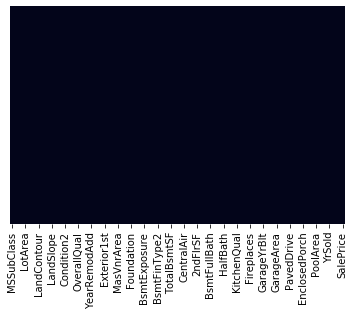

In [32]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Observation

As observed from the heatmap above, we are unable to find any trace of white bar (indicating presence of the NULL values).

This suggests that all the NULL values in the dataset have been properly addressed.

### Analysing the Numerical Variables

Under this part, We are trying to understand the data contained in the numerical variables.

We would want to understand the data distribution in these columns i.e. if the data present is concentrated in a certain range or evenly distributed throughout the range.

To achieve this, we would be plotting a box plot for each of the numerical variables.

The box-plots would provide us a graphical representation of the data density for these columns.

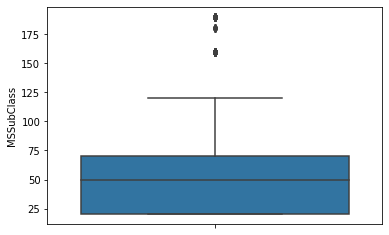

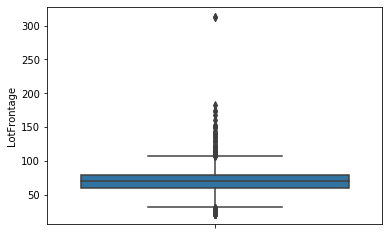

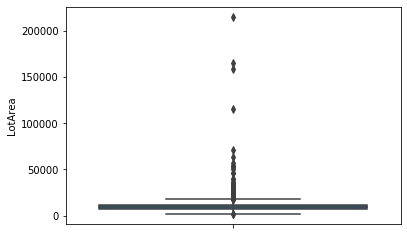

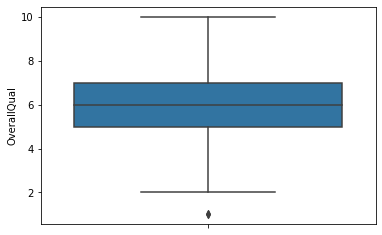

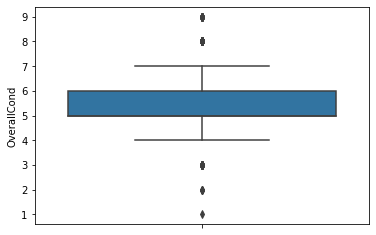

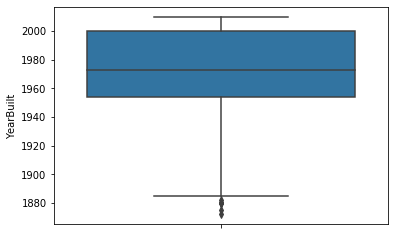

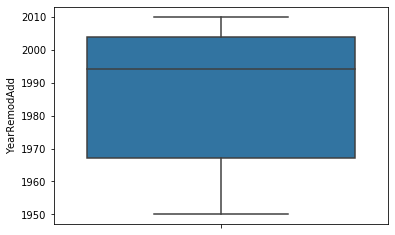

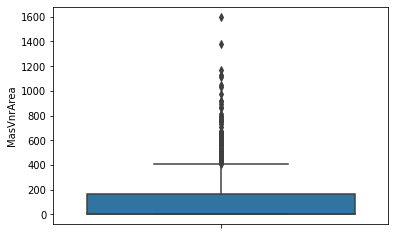

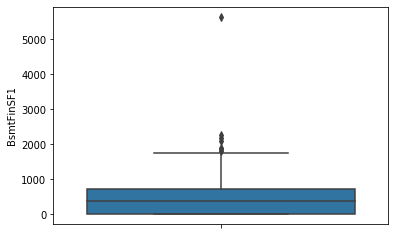

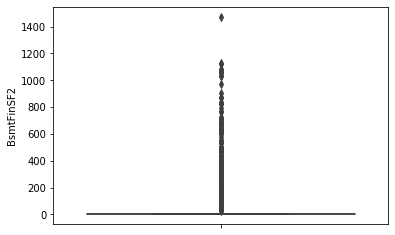

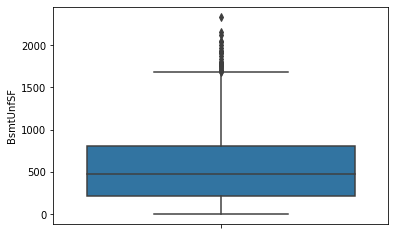

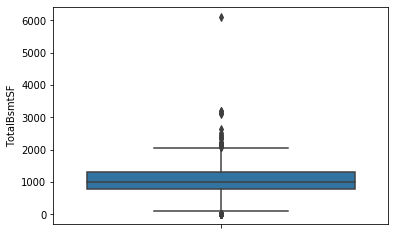

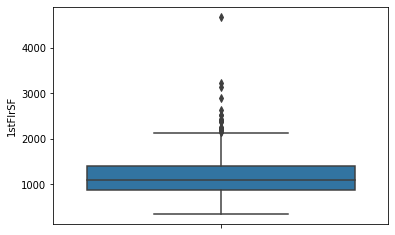

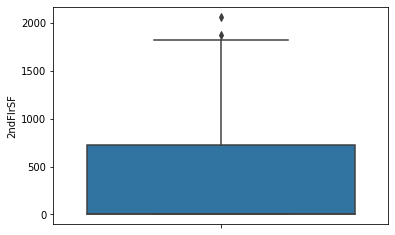

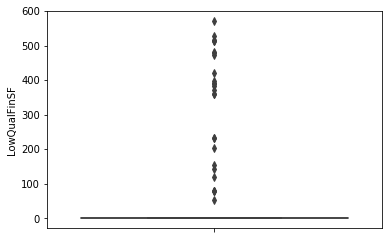

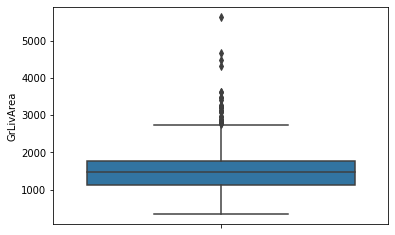

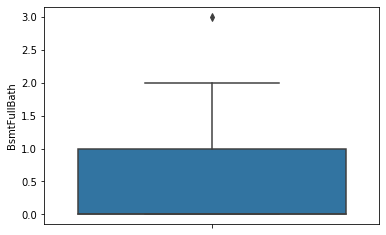

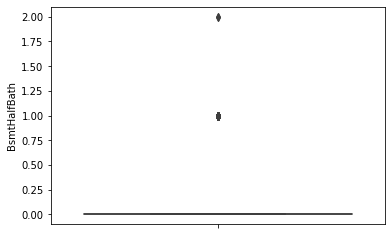

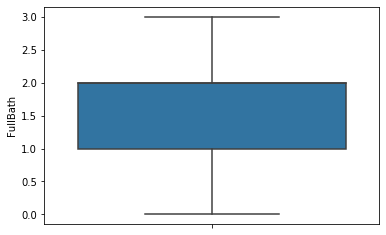

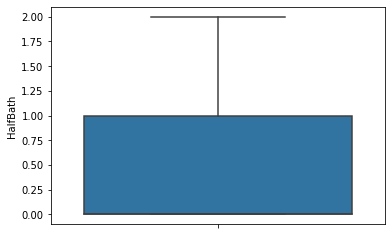

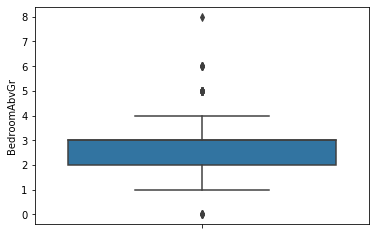

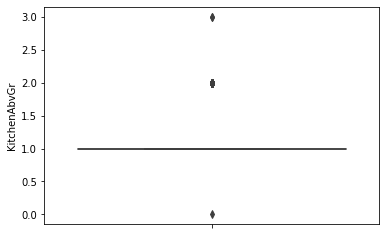

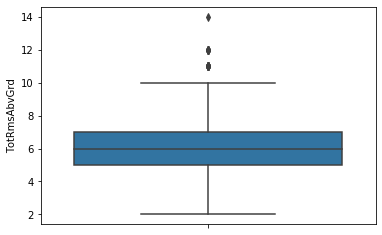

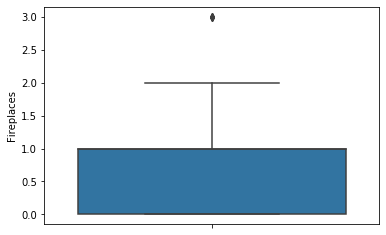

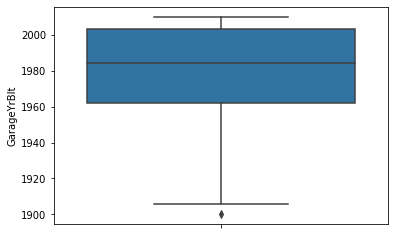

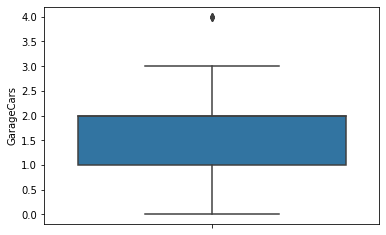

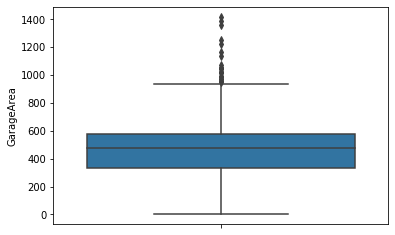

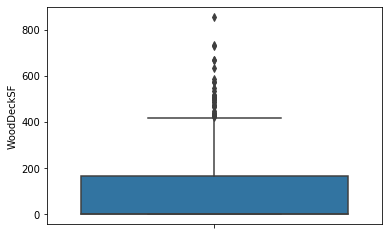

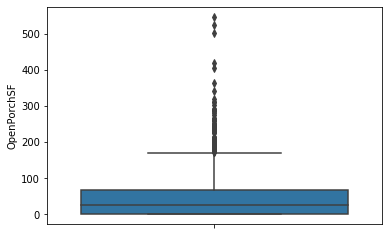

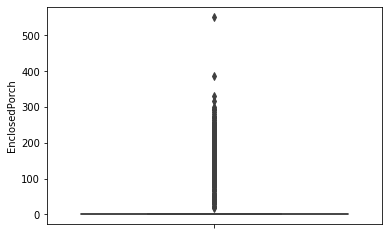

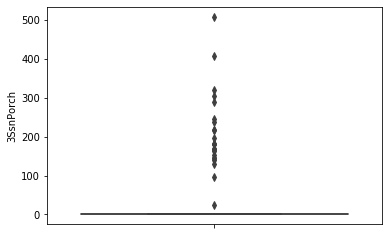

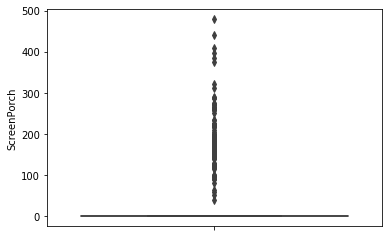

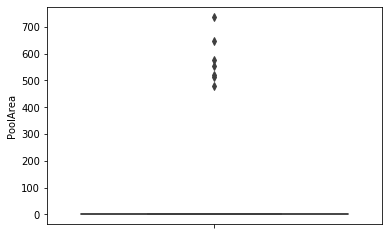

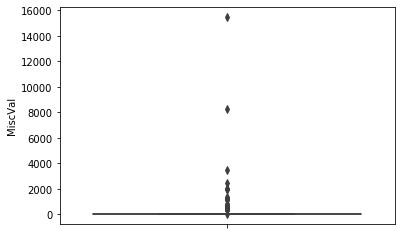

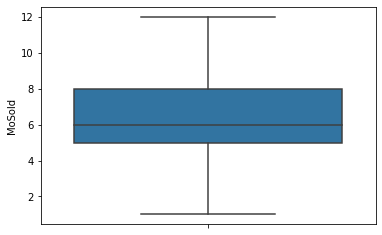

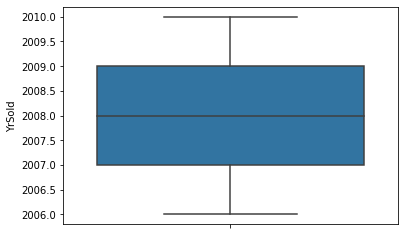

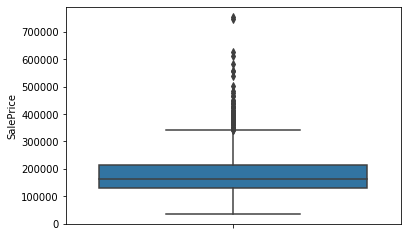

In [34]:
# All the numerical columns in a list
df_numerics_only = df.select_dtypes(include=np.number).columns.tolist()

#Suppressing warnings for plotting multiple plots
plt.rcParams.update({'figure.max_open_warning': 0})

for col in df_numerics_only:
    plt.figure()
    sns.boxplot(y=col, data=df)

Looking at these box-plots, We get a high level idea of the data distribution and the outliers present in the dataset.

We would be identifying the important features here i.e. the features that play a significant role in determining the "SalePrice" of the house and analyse them further.

### Univariate Analysis

We would try to analyse the data distribution for the target variable i.e. "SalePrice" here.

In [36]:
# Decsribing the Sales Price Data
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

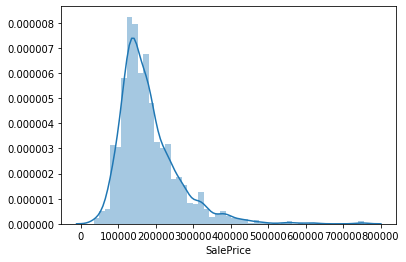

In [37]:
#Plotting Selling Price 
sns.distplot(df.SalePrice)

In [38]:
# Gleaning further info
print("Skewness: %f" % df.SalePrice.skew())
print("Kurtosos: %f" % df.SalePrice.kurt())

Skewness: 1.882876
Kurtosos: 6.536282


#### Observation

Looking the column description, we observe that, the mean price of all the houses turns out to be a tad under  $181k (i.e. $180921).

There is diversity in the house prices indicated by the standard deviation of around $79k.

With the maximum price listed at $755k, we have a long right tail too.

This is further emphasied by the listing out the columns skewness (at 1.8, indicating the data has a right skewness i.e. most of the entries could be found on the right side of the mean value.

The kurtosis value of 6.5 states that the dataset is not normally distributed and shows peakedness.

During the course of the project, We would be applying statistical methods on the dataset and try to make it more normal.

### Bivariate Analysis

To start with, we have zereod in on the below listed columns which by the general understanding of the real-estate sector, are considered crtical to the house buying decisions and greatly impact the SalePrice.

1. OverallQual
2. YearBuilt
3. TotalBsmtSF
4. GrLivArea

Further, We would be performing bi-variate analysis on these variables and check how they relate to the seling price and affect it.

### Analysing "GrLivArea"  vs. "SalePrice"

GrLivArea is the above ground living area (in square feet) 

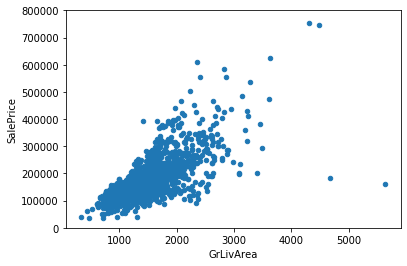

In [39]:
data= pd.concat([df.SalePrice, df.GrLivArea], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

#### Observation

It can be clearly observed that, most of the houses are in the range of 500 sq. feet to 2500 sq. feet.

Both the variables show a linear relationship i.e. an increase in the living area is marked by a proportional increase in the selling price.

We can observe that there are cases, wherein there is astronomical differences/ gaps in the "SalePrice" of houses with similar area.

Similarly, there are cases, wherein houses are sold dirt cheap when compared to the prices of houses with same area.

This indicates that, most probably there would be some other variables/ features in play here, because of which the houses with similar area were expensive/ in-expensive that the normal.

### Analysing "TotalBsmtSF" vs. "SalePrice"

TotalBsmtSF is the basement area in sq. feet.

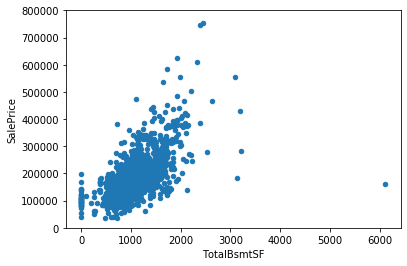

In [40]:
data= pd.concat([df.SalePrice, df.TotalBsmtSF], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

The above scatter plot, shows that the most of the houses have basement area ranging between 500 to 1500 sq. feet.


For most parts of the distribution, both the variables seem to be linearly related to each other with the exception of some outliers.

However, there are also substantial number of cases, wherein the selling price doesn't seem to be affected by the basement area i.e entries found for houses with basement areas as zero.

This is most probably an error in the data accumulation and we would address the same during the EDA phase of the project.

### Categorical variables


#### Analysing the "OverallQual" vs. "SalePrice"

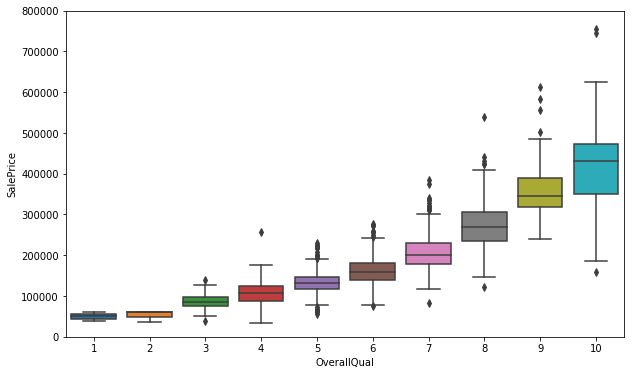

In [42]:
data= pd.concat([df.SalePrice, df.OverallQual], axis=1)
f, ax= plt.subplots(figsize=(10,6))

fig= sns.boxplot(y='SalePrice', x='OverallQual', data=data)
_= fig.axis(ymin=0, ymax=800000)

As expected, The relationship between the Quality and the selling price is pretty straight forward.
Both the variables seem to be linearly related.

The Sale price is showing an increasing trend for houses that are marked with better quality.

#### Analysing "YearBuilt" vs. "SalePrice"

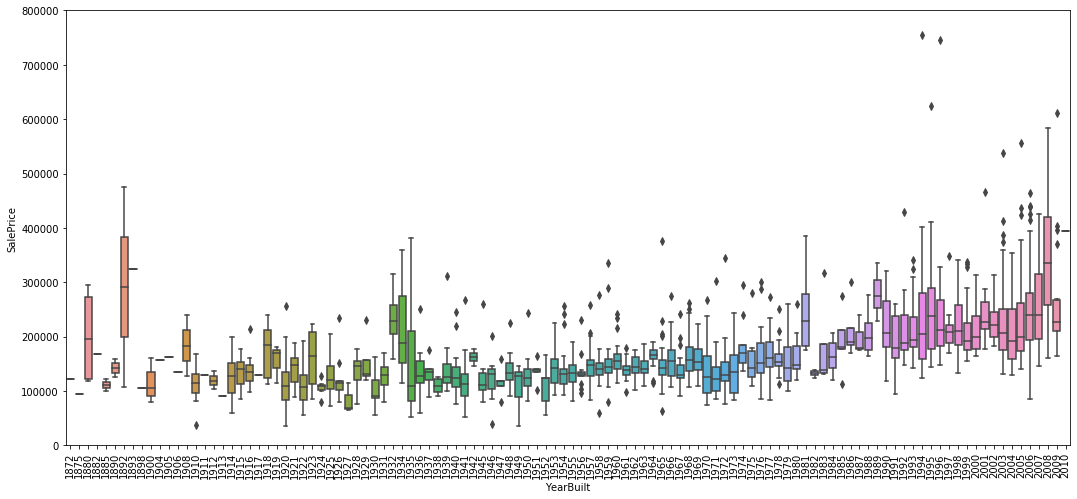

In [43]:
data= pd.concat([df.SalePrice, df.YearBuilt], axis=1)
f, ax= plt.subplots(figsize=(18,8))

fig= sns.boxplot(x='YearBuilt',y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
_= plt.xticks(rotation=90)


Although the price margin is not very substancial.

Nevertheless, We could observe a clear distinction in the house prices indicating that the newly/ recently build houses are more popular and priced higher , when compared to the older one's.
